In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/titanic.csv')
df = df.drop(columns=['Name'])
print(df.describe())
print(df.isnull().sum())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

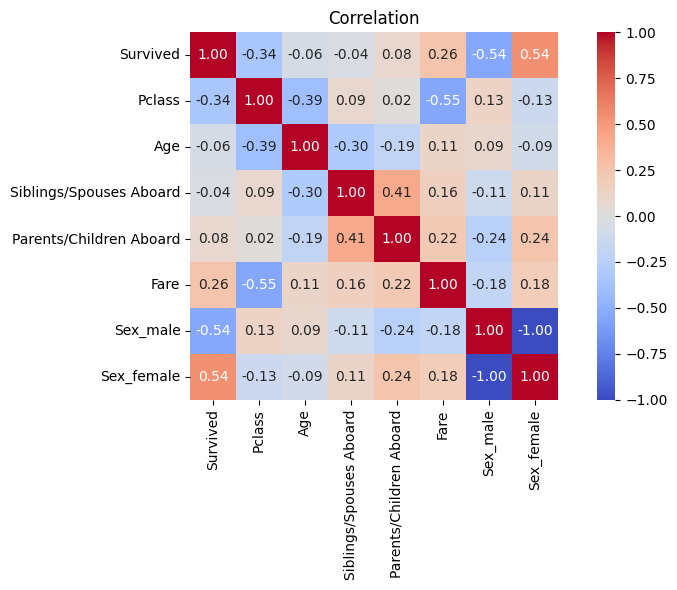

In [21]:

df['Sex_male']   = df['Sex'].map({'male': 1, 'female': 0})
df['Sex_female'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.drop(columns=['Sex'])

plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation')
plt.tight_layout()
plt.show()


In [22]:
df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male,Sex_female
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1,0
883,1,1,19.0,0,0,30.0000,0,1
884,0,3,7.0,1,2,23.4500,0,1
885,1,1,26.0,0,0,30.0000,1,0


In [23]:

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


my_passenger = pd.DataFrame({
    'Pclass':                   [1],
    'Age':                      [25],
    'Siblings/Spouses Aboard':  [0],
    'Parents/Children Aboard':  [0],
    'Fare':                     [50],
    'Sex_male':                 [0],
    'Sex_female':               [1],
})

result = model.predict(my_passenger)[0]
print(f"Prediction: {result}")
print("Survived" if result == 1 else "Did not survive.")

Accuracy: 0.76
Prediction: 1
Survived


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
